##**EDA**

In [1]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from datetime import datetime
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
from imblearn.over_sampling import SMOTE

In [2]:

file_path = r'C:\Users\simsi\Downloads\Peaklytics_intial_data.csv'

df = pd.read_csv(file_path)
df.head()

,Unnamed: 0,name,market,funding_total_usd,status,region,city,funding_rounds,founded_at,founded_month,...,round_A,round_B,round_C,round_D,round_E,round_F,round_G,round_H,country,quater
0,0,#waywire,News,1750000.0,acquired,New York City,New York,1.0,2012-06-01,2012-06,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,United States,Q2
1,2,'Rock' Your Paper,Publishing,40000.0,operating,Tallinn,Tallinn,1.0,2012-10-26,2012-10,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Estonia,Q4
2,3,(In)Touch Network,Electronics,1500000.0,operating,London,London,1.0,2011-04-01,2011-04,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,United Kingdom,Q2
3,4,-R- Ranch and Mine,Tourism,60000.0,operating,Dallas,Fort Worth,2.0,2014-01-01,2014-01,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,United States,Q1
4,10,"1,2,3 Listo",E-Commerce,40000.0,operating,Santiago,Las Condes,1.0,2012-01-01,2012-01,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Chile,Q1


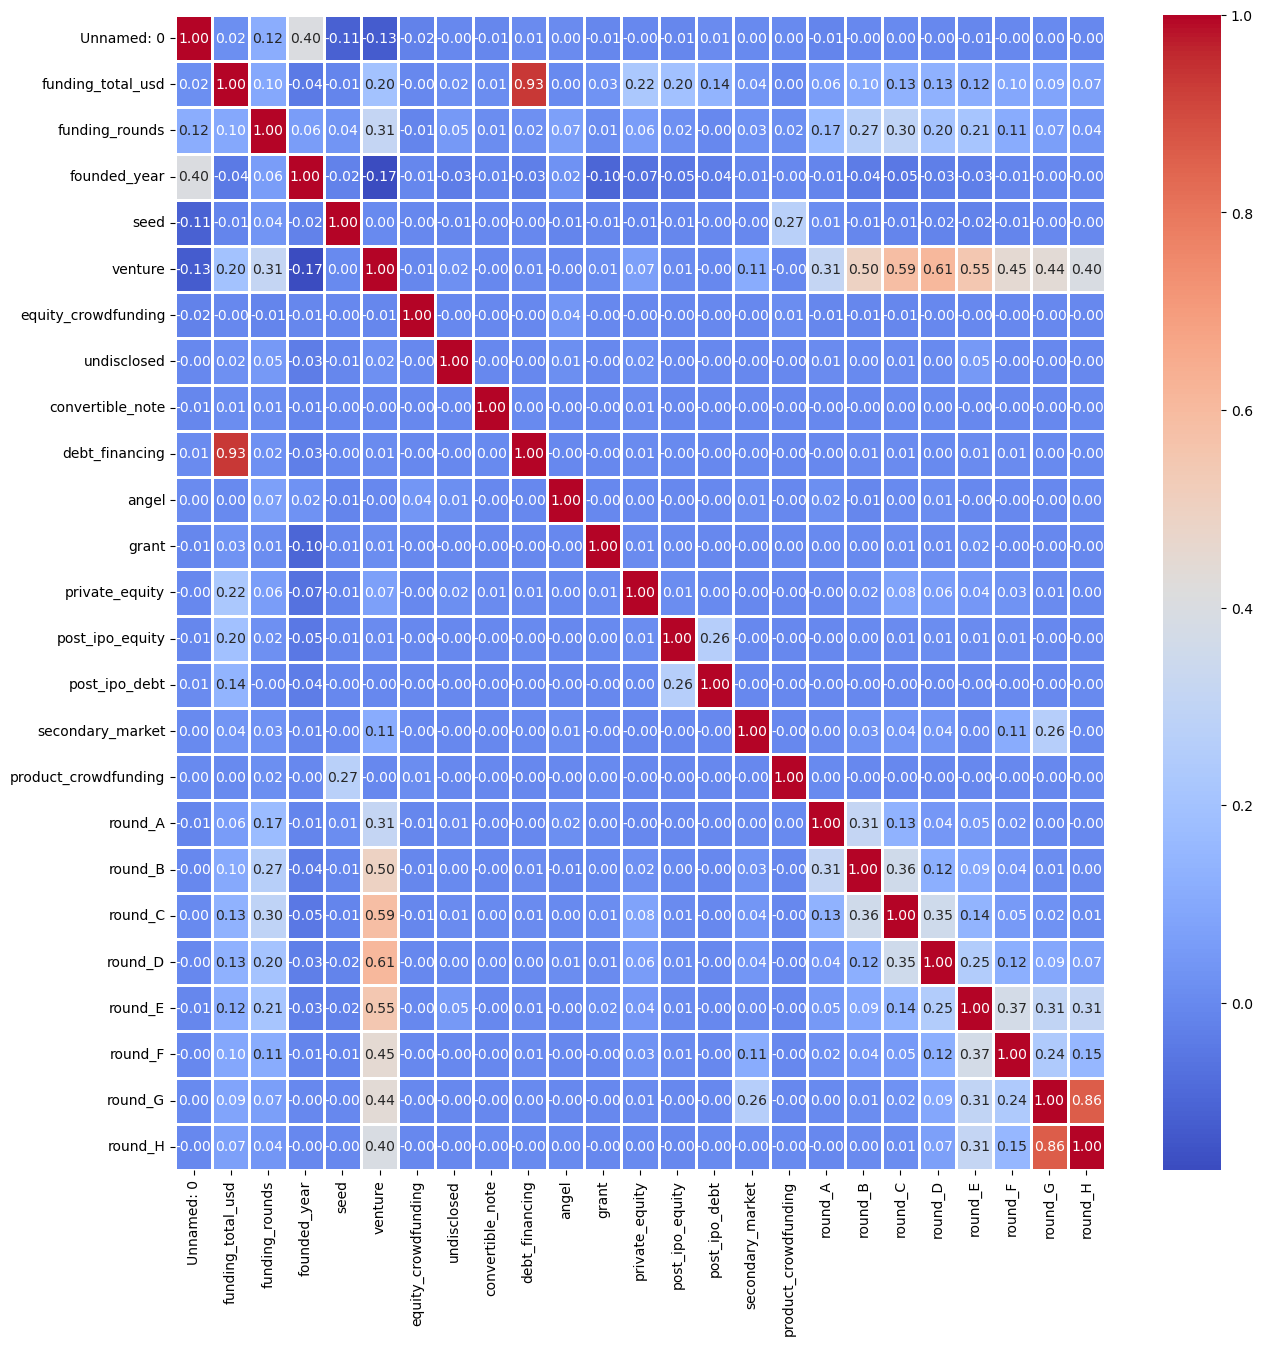

In [3]:
numerical_columns = df.select_dtypes(include=['number']).columns

corr_matrix = df[numerical_columns].corr()
fig, ax = plt.subplots(figsize=(15, 15))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.8, fmt='.2f', ax=ax)
plt.show()

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43268 entries, 0 to 43267
Data columns (total 37 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            43268 non-null  int64  
 1   name                  43268 non-null  object 
 2   market                43268 non-null  object 
 3   funding_total_usd     43268 non-null  float64
 4   status                43268 non-null  object 
 5   region                43268 non-null  object 
 6   city                  43268 non-null  object 
 7   funding_rounds        43268 non-null  float64
 8   founded_at            43268 non-null  object 
 9   founded_month         43268 non-null  object 
 10  founded_quarter       43268 non-null  object 
 11  founded_year          43268 non-null  float64
 12  first_funding_at      43268 non-null  object 
 13  last_funding_at       43268 non-null  object 
 14  seed                  43268 non-null  float64
 15  venture            

In [3]:
df.isnull().sum()

Unnamed: 0                  0
name                        0
market                      0
funding_total_usd           0
status                      0
region                      0
city                        0
funding_rounds              0
founded_at                  0
founded_month               0
founded_quarter             0
founded_year                0
first_funding_at            0
last_funding_at             0
seed                        0
venture                     0
equity_crowdfunding         0
undisclosed             15298
convertible_note        15298
debt_financing          15298
angel                   15298
grant                   15298
private_equity          15298
post_ipo_equity         15298
post_ipo_debt           15298
secondary_market        15298
product_crowdfunding    15298
round_A                 15298
round_B                 15298
round_C                 15298
round_D                 15298
round_E                 15298
round_F                 15298
round_G   

In [4]:
df['status'].value_counts(normalize=True)

status
operating    0.555561
acquired     0.222220
closed       0.222220
Name: proportion, dtype: float64

In [5]:
df['first_funding_at'] = pd.to_datetime(df['first_funding_at'], errors='coerce')
df['last_funding_at'] = pd.to_datetime(df['last_funding_at'], errors='coerce')
df['founded_at'] = pd.to_datetime(df['founded_at'],  errors='coerce')

###Feature Engineering

In [6]:
df['funding_category'] = df.apply(
    lambda x: 'Single Round - Traditional' if x['funding_rounds'] == 1 and x[['seed', 'venture']].sum() == 0
    else 'Single Round - Non-traditional' if x['funding_rounds'] == 1 and x[['seed', 'venture']].sum() > 0
    else 'Multiple Rounds', axis=1
)

In [7]:
current_year = datetime.now().year
df['company_age'] = current_year - df['founded_at'].dt.year

Remove unnecessary features for Peaklytics, as well as features that have high correlation with others.

In [8]:
df.drop(columns=['Unnamed: 0','round_G', 'round_H', 'founded_quarter', 'quater', 'founded_month', 'name', 'founded_year', 'founded_at', 'debt_financing', 'first_funding_at',	'last_funding_at'], inplace=True)

In [9]:

df['status']  = df['status'].apply(lambda x: 'operating' if x == 'acquired' else x)


In [10]:
df['status'].value_counts()

status
operating    33653
closed        9615
Name: count, dtype: int64

Save the cleaned data to a new csv file

In [11]:
df.to_csv('newnotime_cleaned_peaklytics_data.csv', index=False)

# Preprocessing

In [24]:
file_path = r'C:\Users\simsi\Downloads\newnotime_cleaned_peaklytics_data.csv.'

cleaned_df = pd.read_csv(file_path)
cleaned_df.head()

,market,funding_total_usd,status,region,city,funding_rounds,seed,venture,equity_crowdfunding,undisclosed,...,product_crowdfunding,round_A,round_B,round_C,round_D,round_E,round_F,country,funding_category,company_age
0,News,1750000.0,operating,New York City,New York,1.0,1750000.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,United States,Single Round - Non-traditional,12
1,Publishing,40000.0,operating,Tallinn,Tallinn,1.0,40000.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Estonia,Single Round - Non-traditional,12
2,Electronics,1500000.0,operating,London,London,1.0,1500000.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,United Kingdom,Single Round - Non-traditional,13
3,Tourism,60000.0,operating,Dallas,Fort Worth,2.0,0.0,0.0,60000.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,United States,Multiple Rounds,10
4,E-Commerce,40000.0,operating,Santiago,Las Condes,1.0,40000.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Chile,Single Round - Non-traditional,12


In [25]:
cleaned_df.head()

,market,funding_total_usd,status,region,city,funding_rounds,seed,venture,equity_crowdfunding,undisclosed,...,product_crowdfunding,round_A,round_B,round_C,round_D,round_E,round_F,country,funding_category,company_age
0,News,1750000.0,operating,New York City,New York,1.0,1750000.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,United States,Single Round - Non-traditional,12
1,Publishing,40000.0,operating,Tallinn,Tallinn,1.0,40000.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Estonia,Single Round - Non-traditional,12
2,Electronics,1500000.0,operating,London,London,1.0,1500000.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,United Kingdom,Single Round - Non-traditional,13
3,Tourism,60000.0,operating,Dallas,Fort Worth,2.0,0.0,0.0,60000.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,United States,Multiple Rounds,10
4,E-Commerce,40000.0,operating,Santiago,Las Condes,1.0,40000.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Chile,Single Round - Non-traditional,12


In [26]:
cleaned_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43268 entries, 0 to 43267
Data columns (total 27 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   market                43268 non-null  object 
 1   funding_total_usd     43268 non-null  float64
 2   status                43268 non-null  object 
 3   region                43268 non-null  object 
 4   city                  43268 non-null  object 
 5   funding_rounds        43268 non-null  float64
 6   seed                  43268 non-null  float64
 7   venture               43268 non-null  float64
 8   equity_crowdfunding   43268 non-null  float64
 9   undisclosed           27970 non-null  float64
 10  convertible_note      27970 non-null  float64
 11  angel                 27970 non-null  float64
 12  grant                 27970 non-null  float64
 13  private_equity        27970 non-null  float64
 14  post_ipo_equity       27970 non-null  float64
 15  post_ipo_debt      

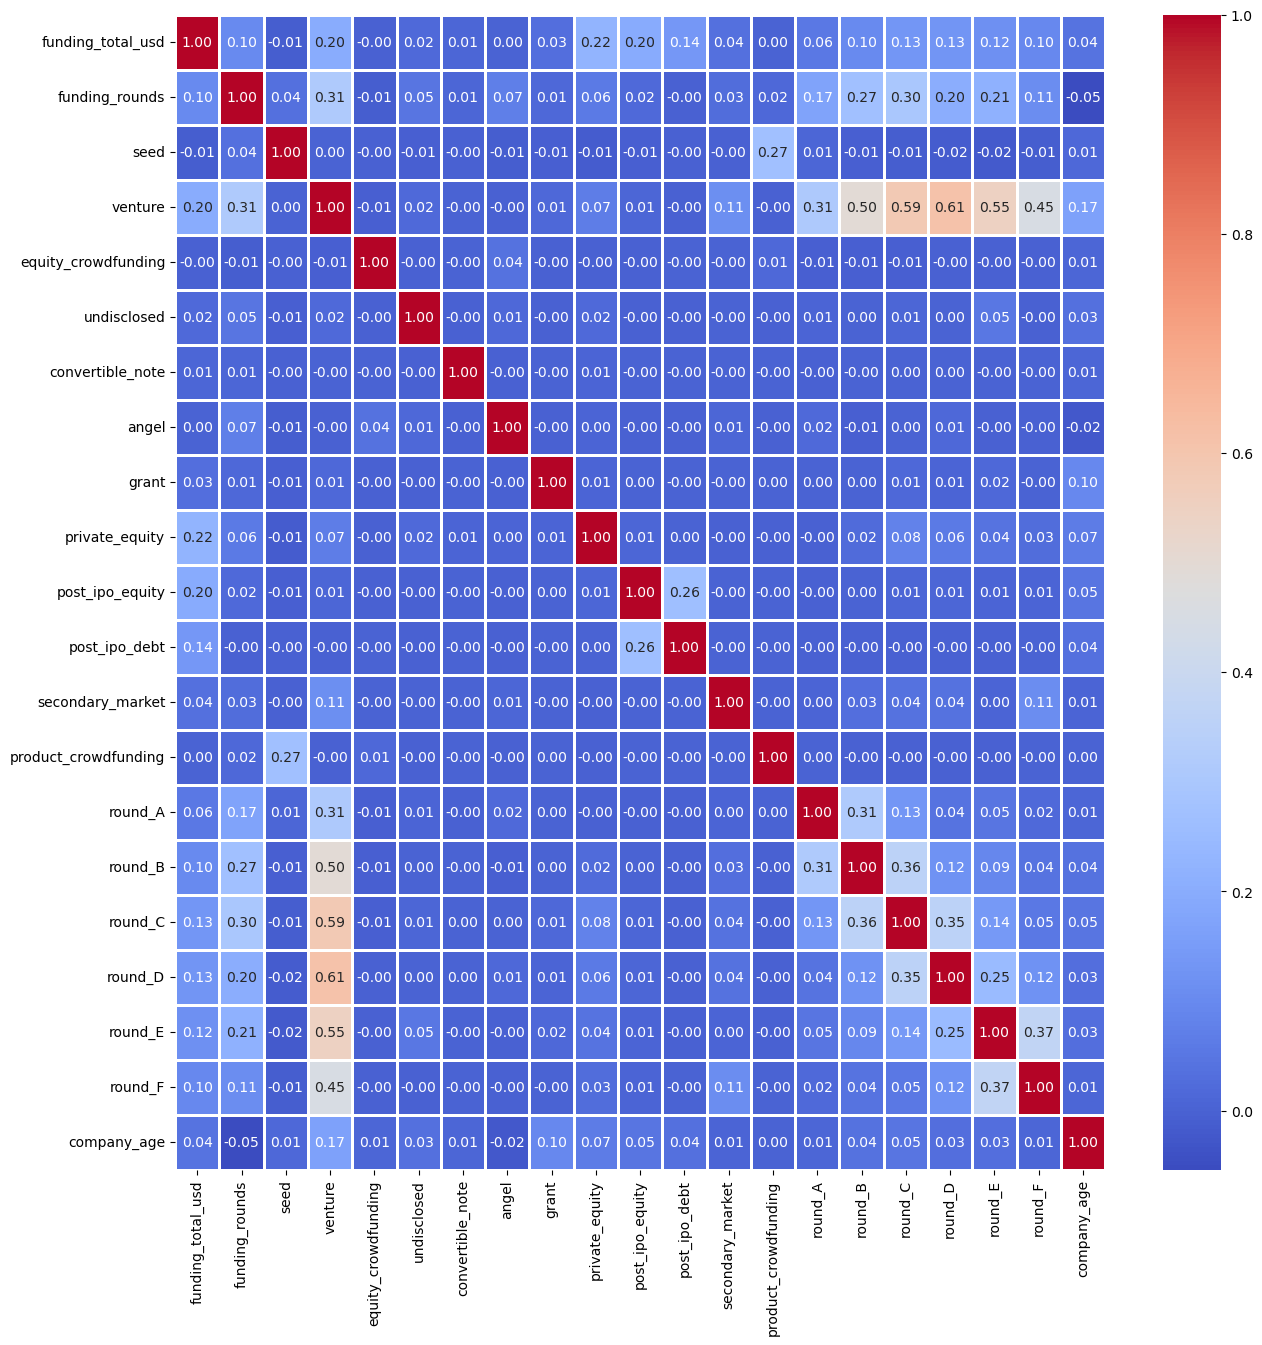

In [27]:
numerical_columns = cleaned_df.select_dtypes(include=['number']).columns

corr_matrix = cleaned_df[numerical_columns].corr()
fig, ax = plt.subplots(figsize=(15, 15))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.8, fmt='.2f', ax=ax)
plt.show()

## Removing outliers, scaling, encoding, and imputing

In [28]:
numerical_columns = cleaned_df.select_dtypes(include=['number']).columns
numerical_columns

Index(['funding_total_usd', 'funding_rounds', 'seed', 'venture',
       'equity_crowdfunding', 'undisclosed', 'convertible_note', 'angel',
       'grant', 'private_equity', 'post_ipo_equity', 'post_ipo_debt',
       'secondary_market', 'product_crowdfunding', 'round_A', 'round_B',
       'round_C', 'round_D', 'round_E', 'round_F', 'company_age'],
      dtype='object')

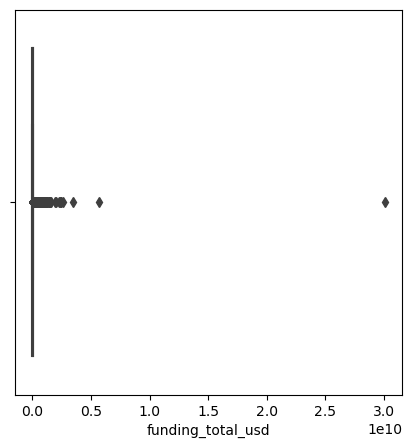

In [29]:
fig, ax = plt.subplots(figsize=(5,5))
sns.boxplot(x='funding_total_usd', data=cleaned_df, ax=ax)
plt.show()

In [30]:
# https://www.geeksforgeeks.org/detect-and-remove-the-outliers-using-python/

Q1 = cleaned_df['funding_total_usd'].quantile(0.25)
Q3 = cleaned_df['funding_total_usd'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1 * IQR #1.25
upper_bound = Q3 + 1 * IQR


cleaned_df = df[(df['funding_total_usd'] >= lower_bound) & (df['funding_total_usd'] <= upper_bound)]


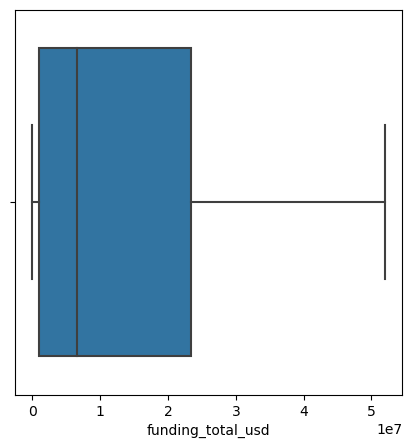

In [31]:
fig, ax = plt.subplots(figsize=(5,5))
sns.boxplot(x='funding_total_usd', data=cleaned_df, ax=ax)
plt.show()

In [32]:
duplicates_before = cleaned_df.duplicated().sum()
print(duplicates_before)
cleaned_df.drop_duplicates(inplace=True)

58


C:\Users\simsi\AppData\Local\Temp\ipykernel_24416\372861287.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_df.drop_duplicates(inplace=True)


In [33]:
duplicates_after = cleaned_df.duplicated().sum()
print(duplicates_after)

0


In [34]:
cleaned_df[['market', 'country', 'funding_category', 'city', 'region']].nunique()

market               699
country              104
funding_category       3
city                2885
region               877
dtype: int64

In [35]:

cleaned_df = pd.get_dummies(cleaned_df, columns=['funding_category', 'country'], drop_first=True)
cleaned_df.head()

,market,funding_total_usd,status,region,city,funding_rounds,seed,venture,equity_crowdfunding,undisclosed,...,country_Tunisia,country_Turkey,country_Uganda,country_Ukraine,country_United Arab Emirates,country_United Kingdom,country_United States,country_Uruguay,country_Uzbekistan,country_Viet Nam
0,News,1750000.0,operating,New York City,New York,1.0,1750000.0,0.0,0.0,0.0,...,False,False,False,False,False,False,True,False,False,False
1,Publishing,40000.0,operating,Tallinn,Tallinn,1.0,40000.0,0.0,0.0,0.0,...,False,False,False,False,False,False,False,False,False,False
2,Electronics,1500000.0,operating,London,London,1.0,1500000.0,0.0,0.0,0.0,...,False,False,False,False,False,True,False,False,False,False
3,Tourism,60000.0,operating,Dallas,Fort Worth,2.0,0.0,0.0,60000.0,0.0,...,False,False,False,False,False,False,True,False,False,False
4,E-Commerce,40000.0,operating,Santiago,Las Condes,1.0,40000.0,0.0,0.0,0.0,...,False,False,False,False,False,False,False,False,False,False


In [36]:
market_freq = cleaned_df['market'].value_counts(normalize=True)
cleaned_df['market_freq'] = cleaned_df['market'].map(market_freq)

city_freq = cleaned_df['city'].value_counts(normalize=True)
cleaned_df['city_freq'] = cleaned_df['city'].map(city_freq)

region_freq = cleaned_df['region'].value_counts(normalize=True)
cleaned_df['region_freq'] = cleaned_df['region'].map(region_freq)

cleaned_df = cleaned_df.drop(columns=['market', 'city', 'region'])
cleaned_df.head()

,funding_total_usd,status,funding_rounds,seed,venture,equity_crowdfunding,undisclosed,convertible_note,angel,grant,...,country_Ukraine,country_United Arab Emirates,country_United Kingdom,country_United States,country_Uruguay,country_Uzbekistan,country_Viet Nam,market_freq,city_freq,region_freq
0,1750000.0,operating,1.0,1750000.0,0.0,0.0,0.0,0.0,0.0,0.0,...,False,False,False,True,False,False,False,0.004692,0.039132,0.043026
1,40000.0,operating,1.0,40000.0,0.0,0.0,0.0,0.0,0.0,0.0,...,False,False,False,False,False,False,False,0.001113,0.000629,0.000629
2,1500000.0,operating,1.0,1500000.0,0.0,0.0,0.0,0.0,0.0,0.0,...,False,False,True,False,False,False,False,0.000484,0.020364,0.024863
3,60000.0,operating,2.0,0.0,0.0,60000.0,0.0,0.0,0.0,0.0,...,False,False,False,True,False,False,False,0.000314,0.000266,0.006288
4,40000.0,operating,1.0,40000.0,0.0,0.0,0.0,0.0,0.0,0.0,...,False,False,False,False,False,False,False,0.022323,0.000048,0.002878


In [37]:
cleaned_df.shape

(41347, 130)

In [38]:
cleaned_df['status'].value_counts()

status
operating    31768
closed        9579
Name: count, dtype: int64

In [39]:
le = LabelEncoder()
cleaned_df['status'] = le.fit_transform(cleaned_df['status'])

In [40]:
cleaned_df.shape

(41347, 130)

In [58]:
#scaler = StandardScaler()
#cleaned_df['funding_total_usd'] = scaler.fit_transform(cleaned_df[['funding_total_usd']])
#cleaned_df.head()

,funding_total_usd,status,funding_rounds,seed,venture,equity_crowdfunding,undisclosed,convertible_note,angel,grant,...,country_Ukraine,country_United Arab Emirates,country_United Kingdom,country_United States,country_Uruguay,country_Uzbekistan,country_Viet Nam,market_freq,city_freq,region_freq
0,-0.782894,1,1.0,1750000.0,0.0,0.0,0.0,0.0,0.0,0.0,...,False,False,False,True,False,False,False,0.004692,0.039132,0.043026
1,-0.897905,1,1.0,40000.0,0.0,0.0,0.0,0.0,0.0,0.0,...,False,False,False,False,False,False,False,0.001113,0.000629,0.000629
2,-0.799709,1,1.0,1500000.0,0.0,0.0,0.0,0.0,0.0,0.0,...,False,False,True,False,False,False,False,0.000484,0.020364,0.024863
3,-0.896560,1,2.0,0.0,0.0,60000.0,0.0,0.0,0.0,0.0,...,False,False,False,True,False,False,False,0.000314,0.000266,0.006288
4,-0.897905,1,1.0,40000.0,0.0,0.0,0.0,0.0,0.0,0.0,...,False,False,False,False,False,False,False,0.022323,0.000048,0.002878


In [41]:
cleaned_df['funding_total_usd'].isnull().sum()

0

In [42]:
cleaned_df['funding_total_usd'].fillna(cleaned_df['funding_total_usd'].median(), inplace=True)

In [43]:
cleaned_df['funding_total_usd'].isnull().sum()

0

In [44]:
cleaned_df.isnull().sum()
cleaned_df.dropna(inplace=True)

In [45]:
cleaned_df.isnull().sum()

funding_total_usd     0
status                0
funding_rounds        0
seed                  0
venture               0
                     ..
country_Uzbekistan    0
country_Viet Nam      0
market_freq           0
city_freq             0
region_freq           0
Length: 130, dtype: int64

In [46]:
cleaned_df.head()

,funding_total_usd,status,funding_rounds,seed,venture,equity_crowdfunding,undisclosed,convertible_note,angel,grant,...,country_Ukraine,country_United Arab Emirates,country_United Kingdom,country_United States,country_Uruguay,country_Uzbekistan,country_Viet Nam,market_freq,city_freq,region_freq
0,1750000.0,1,1.0,1750000.0,0.0,0.0,0.0,0.0,0.0,0.0,...,False,False,False,True,False,False,False,0.004692,0.039132,0.043026
1,40000.0,1,1.0,40000.0,0.0,0.0,0.0,0.0,0.0,0.0,...,False,False,False,False,False,False,False,0.001113,0.000629,0.000629
2,1500000.0,1,1.0,1500000.0,0.0,0.0,0.0,0.0,0.0,0.0,...,False,False,True,False,False,False,False,0.000484,0.020364,0.024863
3,60000.0,1,2.0,0.0,0.0,60000.0,0.0,0.0,0.0,0.0,...,False,False,False,True,False,False,False,0.000314,0.000266,0.006288
4,40000.0,1,1.0,40000.0,0.0,0.0,0.0,0.0,0.0,0.0,...,False,False,False,False,False,False,False,0.022323,0.000048,0.002878


In [47]:
cleaned_df.dtypes

funding_total_usd     float64
status                  int32
funding_rounds        float64
seed                  float64
venture               float64
                       ...   
country_Uzbekistan       bool
country_Viet Nam         bool
market_freq           float64
city_freq             float64
region_freq           float64
Length: 130, dtype: object

In [48]:
today = pd.to_datetime('today')
# cleaned_df['funding_duration_days'] = (cleaned_df['last_funding_at'] - cleaned_df['first_funding_at']).dt.days
#cleaned_df['days_since_first_funding'] = (today - cleaned_df['first_funding_at']).dt.days
#cleaned_df['days_since_last_funding'] = (today - cleaned_df['last_funding_at']).dt.days
#cleaned_df.drop(columns=['first_funding_at', 'last_funding_at'], inplace=True)

In [49]:
X = cleaned_df.drop(columns=['status'])
y = cleaned_df['status']

In [50]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

scaler = StandardScaler()
X_train_resampled[numerical_columns] = scaler.fit_transform(X_train_resampled[numerical_columns])
X_test[numerical_columns] = scaler.transform(X_test[numerical_columns])


In [51]:
X_train_resampled

,funding_total_usd,funding_rounds,seed,venture,equity_crowdfunding,undisclosed,convertible_note,angel,grant,private_equity,...,country_Ukraine,country_United Arab Emirates,country_United Kingdom,country_United States,country_Uruguay,country_Uzbekistan,country_Viet Nam,market_freq,city_freq,region_freq
0,0.458742,-0.605964,-0.355122,0.576081,-0.029733,-0.045602,-0.055478,-0.187154,-0.050218,-0.073335,...,False,False,False,True,False,False,False,0.022323,0.004378,0.000605
1,-0.579416,-0.605964,-0.355122,-0.525176,0.429485,-0.045602,-0.055478,-0.187154,-0.050218,-0.073335,...,False,False,False,True,False,False,False,0.003096,0.002153,0.005152
2,2.236947,-0.605964,-0.355122,2.448218,-0.029733,-0.045602,-0.055478,-0.187154,-0.050218,-0.073335,...,False,False,False,True,False,False,False,0.002370,0.001620,0.001886
3,-0.273460,-0.605964,-0.355122,-0.194799,-0.029733,-0.045602,-0.055478,-0.187154,-0.050218,-0.073335,...,False,False,False,True,False,False,False,0.022227,0.039132,0.043026
4,-0.555881,0.291628,0.078309,-0.525176,-0.029733,-0.045602,-0.055478,-0.187154,-0.050218,-0.073335,...,False,False,False,True,False,False,False,0.003265,0.006167,0.009166
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39413,-0.582031,-0.605964,-0.282883,-0.525176,-0.029733,-0.045602,-0.055478,-0.187154,-0.050218,-0.073335,...,False,False,False,True,False,False,False,0.012782,0.018738,0.020812
39414,1.746314,-0.227205,-0.355122,1.894491,-0.029733,-0.045602,-0.055478,-0.187154,-0.050218,-0.073335,...,False,False,False,True,False,False,False,0.051408,0.004682,0.096499
39415,-0.576801,-0.605964,-0.210645,-0.525176,-0.029733,-0.045602,-0.055478,-0.187154,-0.050218,-0.073335,...,False,False,False,False,False,False,False,0.004537,0.004103,0.004957
39416,-0.581038,-0.605964,-0.269172,-0.525176,-0.029733,-0.045602,-0.055478,-0.187154,-0.050218,-0.073335,...,False,False,True,False,False,False,False,0.026073,0.000092,0.000092


## Reduced Features

In [54]:
log_reg.fit(X_train_resampled[numerical_columns], y_train_resampled)

feature_importance = pd.DataFrame({
    'Feature': numerical_columns,
    'Importance': log_reg.coef_[0]
})

feature_importance = feature_importance.sort_values(by='Importance', ascending=False)

print(feature_importance)


                 Feature  Importance
4    equity_crowdfunding    6.255419
13  product_crowdfunding    2.736170
11         post_ipo_debt    0.758591
9         private_equity    0.646206
5            undisclosed    0.561118
1         funding_rounds    0.299549
2                   seed    0.234158
0      funding_total_usd    0.146023
3                venture    0.118852
6       convertible_note    0.105388
8                  grant    0.074579
10       post_ipo_equity    0.027083
18               round_E    0.000674
19               round_F   -0.012614
14               round_A   -0.013096
17               round_D   -0.043301
12      secondary_market   -0.069888
7                  angel   -0.076842
20           company_age   -0.081112
16               round_C   -0.083375
15               round_B   -0.094039


## Logistic Regression

In [55]:

from sklearn.model_selection import RandomizedSearchCV

param_dist_logreg = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'solver': ['lbfgs', 'liblinear', 'sag', 'saga'],
    'max_iter': [200, 500, 1000, 2000]
}

features_to_drop_svm = ['round_E', 'round_F', 'round_A', 'round_D', 'secondary_market', 
                        'angel', 'company_age', 'round_C', 'round_B']

X_train_reduced = X_train_resampled.drop(columns=features_to_drop_svm)
X_test_reduced = X_test.drop(columns=features_to_drop_svm)

log_reg = LogisticRegression(random_state=42, class_weight='balanced')

random_search_logreg = RandomizedSearchCV(log_reg, param_distributions=param_dist_logreg, 
                                          n_iter=10, cv=5, scoring='accuracy', 
                                          random_state=42, n_jobs=-1)  

random_search_logreg.fit(X_train_reduced, y_train_resampled)

best_log_reg = random_search_logreg.best_estimator_

y_pred_log_reg_reduced = best_log_reg.predict(X_test_reduced)

accuracy_log_reg_reduced = accuracy_score(y_test, y_pred_log_reg_reduced)
classification_report_log_reg_reduced = classification_report(y_test, y_pred_log_reg_reduced)
roc_auc_log_reg_reduced = roc_auc_score(y_test, best_log_reg.predict_proba(X_test_reduced)[:, 1])

print(f"Accuracy of Logistic Regression (Reduced Features): {accuracy_log_reg_reduced}")
print(f"Classification Report for Logistic Regression (Reduced Features):\n{classification_report_log_reg_reduced}")
print(f"ROC-AUC for Logistic Regression (Reduced Features): {roc_auc_log_reg_reduced}")


Accuracy of Logistic Regression (Reduced Features): 0.7134357005758157
Classification Report for Logistic Regression (Reduced Features):
              precision    recall  f1-score   support

           0       0.09      0.44      0.14       284
           1       0.96      0.73      0.83      4926

    accuracy                           0.71      5210
   macro avg       0.52      0.58      0.49      5210
weighted avg       0.91      0.71      0.79      5210

ROC-AUC for Logistic Regression (Reduced Features): 0.586925940539706


## SVM

Linear SVM

In [69]:
features_to_drop_svm = ['round_E', 'round_F', 'round_A', 'round_D', 'secondary_market', 
                        'angel', 'company_age', 'round_C', 'round_B']

X_train_reduced_svm = X_train_resampled.drop(columns=features_to_drop_svm)
X_test_reduced_svm = X_test.drop(columns=features_to_drop_svm)

linear_svm_reduced = LinearSVC(random_state=42, class_weight='balanced', max_iter=3000)
linear_svm_reduced.fit(X_train_reduced_svm, y_train_resampled)

y_pred_svm_reduced = linear_svm_reduced.predict(X_test_reduced_svm)

accuracy_svm_reduced = accuracy_score(y_test, y_pred_svm_reduced)
classification_report_svm_reduced = classification_report(y_test, y_pred_svm_reduced)
roc_auc_svm_reduced = roc_auc_score(y_test, y_pred_svm_reduced)

print(f"Accuracy of Linear SVM (Reduced Features): {accuracy_svm_reduced}")
print(f"Classification Report for Linear SVM (Reduced Features):\n{classification_report_svm_reduced}")
print(f"ROC-AUC for Linear SVM (Reduced Features): {roc_auc_svm_reduced}")


Accuracy of Linear SVM (Reduced Features): 0.70978886756238
Classification Report for Linear SVM (Reduced Features):
              precision    recall  f1-score   support

           0       0.08      0.44      0.14       284
           1       0.96      0.73      0.83      4926

    accuracy                           0.71      5210
   macro avg       0.52      0.58      0.48      5210
weighted avg       0.91      0.71      0.79      5210

ROC-AUC for Linear SVM (Reduced Features): 0.5810788400725098


c:\Users\simsi\anaconda3\lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Poly SVM

In [57]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score

features_to_drop_svm = ['round_E', 'round_F', 'round_A', 'round_D', 'secondary_market', 
                        'angel', 'company_age', 'round_C', 'round_B']

X_train_reduced_svm = X_train_resampled.drop(columns=features_to_drop_svm)
X_test_reduced_svm = X_test.drop(columns=features_to_drop_svm)

poly_svm = SVC(kernel='poly', class_weight='balanced', random_state=42)
poly_svm.fit(X_train_reduced_svm, y_train_resampled)

y_pred_poly_svm = poly_svm.predict(X_test_reduced_svm)

accuracy_poly = accuracy_score(y_test, y_pred_poly_svm)
classification_report_poly = classification_report(y_test, y_pred_poly_svm)
roc_auc_poly = roc_auc_score(y_test, poly_svm.decision_function(X_test_reduced_svm))

print(f"Accuracy of Poly SVM (Reduced Features): {accuracy_poly}")
print(f"Classification Report for Poly SVM (Reduced Features):\n{classification_report_poly}")
print(f"ROC-AUC for Poly SVM (Reduced Features): {roc_auc_poly}")


Accuracy of Poly SVM (Reduced Features): 0.7032629558541267
Classification Report for Poly SVM (Reduced Features):
              precision    recall  f1-score   support

           0       0.09      0.46      0.14       284
           1       0.96      0.72      0.82      4926

    accuracy                           0.70      5210
   macro avg       0.52      0.59      0.48      5210
weighted avg       0.91      0.70      0.78      5210

ROC-AUC for Poly SVM (Reduced Features): 0.6246597530779479
